# **Section 3: Solving for the optimal weights**

## **Linear discriminant analysis (LDA)**

Let us assume that our two classes follow a multivariate Gaussian distributions:
\begin{align}
p(x|y=i) &= \frac{1}{\sqrt{(2\pi)^D |\Sigma|}} \exp\left[-\frac{1}{2} (x-\mu_i)^T \Sigma^{-1} (x-\mu_i)\right],
\end{align}
where $\mu_i$ (D-dimensional vector) and $\Sigma$ (D x D matrix) are the respective means and covariances.
Using Bayes' rule, we write $p(y|x)$ as
$$
p(y|x) = \frac{p(x|y)p(y)}{p(x)}
$$
Writing this for the positive class, and expanding the denominator using the law of total probability, we get:
$$
p(y=1|x) = \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1) + p(x|y=0)p(y=0)}.
$$
Dividing by the numerator, we get an expression which resembles the sigmoid function:
$$
p(y=1|x) = \frac{1}{1 + \dfrac{p(x|y=0)p(y=0)}{p(x|y=1)p(y=1)}} = \frac{1}{1 + \mathrm{e}^{-w^T x + b}}.
$$
Thus, we can write:
$$
-(w^Tx + b) = \ln\left( \frac{p(x|y=0)p(y=0)}{p(x|y=1)p(y=1)} \right).
$$
Let's set $p(y=0) = \alpha$ and conversly $p(y=1) = 1 - \alpha$ and expand the logarithms:
$$
-(w^T x + b) = \ln p(x|y=0) + \ln \alpha - \ln p(x|y=1) - \ln(1-\alpha).
$$
Subsitute in $p(x|y=i)$:
$$
-(w^T x + b) = \ln\left(\frac{1}{\sqrt{(2\pi)^D} |\Sigma|} \right) + \left( -\frac{1}{2} (x-\mu_0)^T \Sigma^{-1} (x-\mu_0) \right) - \ln\left(\frac{1}{\sqrt{(2\pi)^D} |\Sigma|} \right) - \left( -\frac{1}{2} (x-\mu_1)^T \Sigma^{-1} (x-\mu_1) \right) + \ln\left( \frac{\alpha}{1-\alpha} \right)
$$
Using logarithmic identities and expanding the parantheses, we get:
$$
-(w^T x + b) =
\frac{1}{2} \left( x^T\Sigma^{-1} x - \mu_1^T\Sigma^{-1}x - x^T\Sigma^{-1}\mu_1 + \mu_1^T\Sigma^{-1}\mu_1 \right) - \frac{1}{2} \left( x^T\Sigma^{-1} x - \mu_0^T\Sigma^{-1}x - x^T\Sigma^{-1}\mu_0 + \mu_0^T\Sigma^{-1}\mu_0 \right) + \ln\left( \frac{\alpha}{1-\alpha} \right)
$$
This can be simplified using that for a symmetric matrix $x^TAy = y^T A x$:
$$
-(w^T x + b) =
\frac{1}{2} \left( - 2\mu_1^T\Sigma^{-1}x + \mu_1^T\Sigma^{-1}\mu_1 \right) - \frac{1}{2} \left( - 2\mu_0^T\Sigma^{-1}x + \mu_0^T\Sigma^{-1}\mu_0 \right) + \ln\left( \frac{\alpha}{1-\alpha} \right)
$$
Finally, we can extract $w$ and $b$:
\begin{align}
w^T &= (\mu_1^T-\mu_0^T) \Sigma^{-1} \\
b &= \frac{1}{2} \mu_0^T\Sigma^{-1}\mu_0  - \frac{1}{2} \mu_1^T\Sigma^{-1}\mu_1 - \ln\left( \frac{\alpha}{1-\alpha}\right).
\end{align}

## **Quadratic discriminant analysis**

Now, consider the case when the covariances are different:
\begin{align}
p(x|y=i) &= \frac{1}{\sqrt{(2\pi)^D |\Sigma_i|}} \exp\left[-\frac{1}{2} (x-\mu_i)^T \Sigma_i^{-1} (x-\mu_i)\right],
\end{align}

As the equations will be quadratic in $x$; therefore, we will use the following form of predictions:
\begin{align}
\sigma(z = x^T A x + x^T B + C),
\end{align}
where $A$ is a $D \times D$ matrix, $B$ is a $D \times 1$ vector, and $C$ is a scalar.

We will start again from the expanded form of Bayes' theorem:

$$
p(y=1|x) = \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1) + p(x|y=0)p(y=0)}.
$$
Again, dividing by the numerator, we get the usual sigmoid-like expression:
$$
p(y=1|x) = \frac{1}{1 + \dfrac{p(x|y=0)p(y=0)}{p(x|y=1)p(y=1)}} = \frac{1}{1 + \mathrm{e}^{-(x^TAx + x^T B + C)}}.
$$
Thus, we can write:
$$
-(x^TAx + x^T B + C) = \ln\left( \frac{p(x|y=0) \cdot \alpha}{p(x|y=1) \cdot (1-\alpha)} \right).
$$
Subsituting $p(x|y)$ and using identities of logarithms:
$$
-(x^TAx + x^T B + C) = \frac{1}{2} \left( x^T\Sigma_1^{-1} x - \mu_1^T\Sigma_1^{-1}x - x^T\Sigma_1^{-1}\mu_1 + \mu_1^T\Sigma_1^{-1}\mu_1 \right) - \frac{1}{2} \left( x^T\Sigma_0^{-1} x - \mu_0^T\Sigma_0^{-1}x - x^T\Sigma_0^{-1}\mu_0 + \mu_0^T\Sigma_0^{-1}\mu_0 \right) + \ln\left( \frac{|\Sigma_1|}{|\Sigma_0|} \right) + \ln\left( \frac{\alpha}{1-\alpha} \right).
$$
We can calculate $A$, $B$, and $C$:
\begin{align}
A &= \frac{1}{2} \left( \Sigma_0^{-1} - \Sigma_1^{-1} \right), \\
B &= \Sigma_1^{-1} \mu_1 - \Sigma_0^{-1} \mu_0, \\
C &= \frac{1}{2} \mu_0^T \Sigma_0^{-1} \mu_0 - \frac{1}{2} \mu_1^T \Sigma_1^{-1} \mu_1 - \ln\left( \frac{|\Sigma_1|}{|\Sigma_0|} \right) - \ln\left( \frac{\alpha}{1-\alpha} \right).
\end{align}

### Exercise

Let $\mu_0 = (-2,-2)$, $\mu_1 = (2,2)$, and $\Sigma = I$. Assume equal number of samples of each class, thus $\alpha = 0.5$.

* Solve this on 'paper'
* Write a code to perform LDA and QDA. Compare their performances

\begin{align}
w^T &= \left( [ 2 \quad 2] - [-2 \quad -2] \right) \left[
  \begin{matrix}
  1 & 0 \\
  0 & 1
  \end{matrix} \right]^{-1} = [4 \quad 4] \\
b &= \frac{1}{2} \mu_0^T \mu_0 - \frac{1}{2} \mu_1^T \mu_1 = 0.5 \cdot \left[(-2)(-2)+(-2)(-2)\right] - 0.5 \cdot \left[ (2\cdot 2) + (2 \cdot 2) \right] = 0
\end{align}

In [348]:
import numpy as np
import matplotlib.pyplot as plt

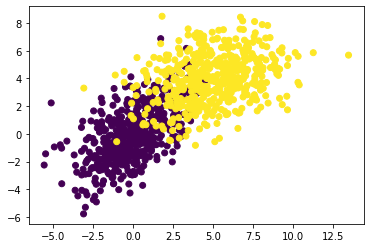

In [349]:
# First generating a dataset
true_mu_0 = np.array([0,0])
true_mu_1 = np.array([5,4])

true_Sigma_0 = np.array([ [3,2],[2,4] ])
true_Sigma_1 = np.array([ [5,1],[1,3] ])

N = 1000
alpha = 0.5

X0 = np.random.multivariate_normal(true_mu_0,true_Sigma_0,int(N*alpha))
X1 = np.random.multivariate_normal(true_mu_1,true_Sigma_1,int(N*(1-alpha)))

y0 = [0]*int(N*alpha)
y1 = [1]*int(N*(1-alpha))

# Stacking the two sets
X = np.concatenate((X0,X1))
Y = np.concatenate((y0,y1))

plt.scatter(X[:,0],X[:,1],c=Y);

In [350]:
# Split data into train and test sets
def trainTestSplit(X,y, test_ratio):
  # Shuffling both vector in unison
  p = np.random.permutation(X.shape[0])
  X_shuffled = X[p]
  y_shuffled = y[p]

  n_test = int(0.3*X.shape[0])

  X_test = X_shuffled[:n_test,:]
  y_test = y_shuffled[:n_test]
  X_train = X_shuffled[n_test:,:]
  y_train = y_shuffled[n_test:]
  return X_train, y_train, X_test, y_test

In [359]:
# classes to perform QDA and LDA

def sigmoid(z):
  return 1. / (1. + np.exp(-z))

class QDA():
  def fit(self,X,y):
    # As a first step, we calculate the sample mean and sample covariance
    mu_0 = X[y == 0].mean(axis=0)
    mu_1 = X[y == 1].mean(axis=0)
    Sigma_0 = np.cov(X[y == 0],rowvar=False)
    Sigma_1 = np.cov(X[y == 1],rowvar=False)

    # Invert covariance matrices and calculate determinants
    inv_Sigma_0 = np.linalg.inv(Sigma_0)
    inv_Sigma_1 = np.linalg.inv(Sigma_1)
    det_Sigma_0 = np.linalg.det(Sigma_0)
    det_Sigma_1 = np.linalg.det(Sigma_1)
    
    # Perform QDA
    self.A = 0.5* (inv_Sigma_0-inv_Sigma_1)
    self.B = inv_Sigma_1 @ mu_1 - inv_Sigma_0 @ mu_0
    self.C = ( 0.5*mu_0.T @ inv_Sigma_0 @ mu_0 - 0.5*mu_1.T @ inv_Sigma_1 @ mu_1 ) - np.log(det_Sigma_1 / det_Sigma_0) - np.log(alpha/(1.-alpha))
  
  def predict(self,X):
    if(X.ndim == 2):
      return np.round(sigmoid( (X @ self.A @ X.T).diagonal() + X @ self.B + self.C))
    else:
      return np.round(sigmoid( (X @ self.A @ X.T) + X @ self.B + self.C))

  def score(self,X,y):
    return np.mean(self.predict(X) == y)

In [358]:
class LDA():
  def fit(self,X,y):
    # As a first step, we calculate the sample mean and sample covariance
    mu_0 = X[y == 0].mean(axis=0)
    mu_1 = X[y == 1].mean(axis=0)

    Sigma_0 = np.cov(X[y == 0],rowvar=False)
    Sigma_1 = np.cov(X[y == 1],rowvar=False)

    # For LDA, use the average of the two covariance matrices
    Sigma = 0.5*(Sigma_0 + Sigma_1)

    # Invert covariance matrix
    inv_Sigma = np.linalg.inv(Sigma)
    
    # Perform LDA
    self.w = (( mu_1.T - mu_0.T)@inv_Sigma).T
    self.b = ( 0.5*mu_0.T @ inv_Sigma @ mu_0 - 0.5*mu_1.T @ inv_Sigma @ mu_1 ) - np.log(alpha/(1.-alpha))

  def predict(self,X):
    return np.round(sigmoid(X @ self.w + self.b))

  def score(self,X,y):
    return np.mean(self.predict(X) == y)

In [352]:
# Finally, perform the calculations

X_train, y_train, X_test, y_test = trainTestSplit(X,Y,0.2)

model_1 = QDA()
model_1.fit(X_train,y_train)

model_2 = LDA()
model_2.fit(X_train,y_train)

print("QDA accuracy:",model_1.score(X_test,y_test))
print("LDA accuracy:",model_2.score(X_test,y_test))

QDA accuracy: 0.9433333333333334
LDA accuracy: 0.9333333333333333


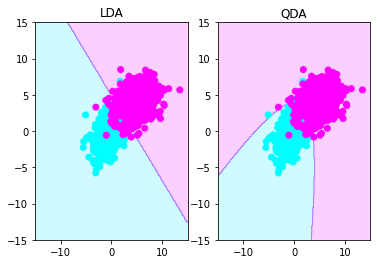

In [353]:
# plotting decision boundaries

x_plot = y_plot = np.linspace(-15, 15, 300)

z_1 = np.array([model_1.predict(np.array([i,j])) for j in y_plot for i in x_plot])
z_2 = np.array([model_2.predict(np.array([i,j])) for j in y_plot for i in x_plot])
Z_1 = z_1.reshape(300,300)
Z_2 = z_2.reshape(300,300)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

plt.subplot(1,2,1)
plt.contourf(x_plot,y_plot,Z_2,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='cool');
plt.title("LDA")

plt.subplot(1,2,2)
plt.contourf(x_plot,y_plot,Z_1,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='cool');
plt.title("QDA");

Now, trying to generate a dataset, where QDA performs much better:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':


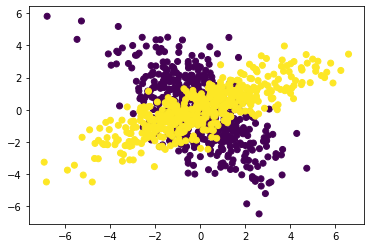

In [354]:
# First generating a dataset
true_mu_0 = np.array([0,0])
true_mu_1 = np.array([0,0])

true_Sigma_0 = np.array([ [1,-3],[-3,3] ])
true_Sigma_1 = np.array([ [5,3],[3,1] ])

N = 1000
alpha = 0.5

X0 = np.random.multivariate_normal(true_mu_0,true_Sigma_0,int(N*alpha))
X1 = np.random.multivariate_normal(true_mu_1,true_Sigma_1,int(N*(1-alpha)))

y0 = [0]*int(N*alpha)
y1 = [1]*int(N*(1-alpha))

# Stacking the two sets
X = np.concatenate((X0,X1))
Y = np.concatenate((y0,y1))

plt.scatter(X[:,0],X[:,1],c=Y);

In [355]:
# Perform the calculations

X_train, y_train, X_test, y_test = trainTestSplit(X,Y,0.2)

model_1 = QDA()
model_1.fit(X_train,y_train)

model_2 = LDA()
model_2.fit(X_train,y_train)

print("QDA accuracy:",model_1.score(X_test,y_test))
print("LDA accuracy:",model_2.score(X_test,y_test))

QDA accuracy: 0.7666666666666667
LDA accuracy: 0.45


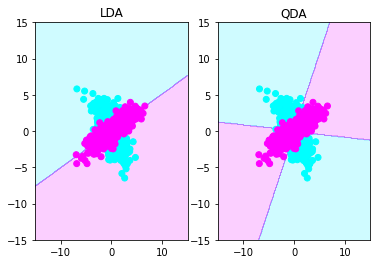

In [356]:
# plotting decision boundaries

x_plot = y_plot = np.linspace(-15, 15, 300)

z_1 = np.array([model_1.predict(np.array([i,j])) for j in y_plot for i in x_plot])
z_2 = np.array([model_2.predict(np.array([i,j])) for j in y_plot for i in x_plot])
Z_1 = z_1.reshape(300,300)
Z_2 = z_2.reshape(300,300)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

plt.subplot(1,2,1)
plt.contourf(x_plot,y_plot,Z_2,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='cool');
plt.title("LDA")

plt.subplot(1,2,2)
plt.contourf(x_plot,y_plot,Z_1,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='cool');
plt.title("QDA");